In [101]:
import matplotlib.pyplot as plt
import numpy as np
import math

### 1. Euclidean plane

Consider this 3 points on 2D space:  
$A=(4, 5)$  
$B=(-2, -4)$  
$C=(8, -1)$  

#### 1.1. Plot them using `matplotlib`  

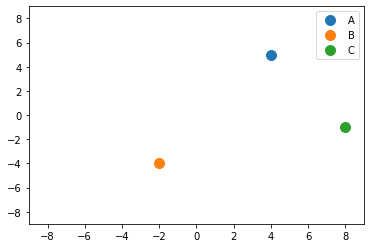

In [3]:
A = (4, 5)
B = (-2, -4)
C = (8, -1)
# create a plot
fig, ax = plt.subplots()

# add points. "o" stands for circle, "*" would be a star point
plt.plot(A[0], A[1], "o", markersize=10, label="A")
plt.plot(B[0], B[1], "o", markersize=10, label="B")
plt.plot(C[0], C[1], "o", markersize=10, label="C")

# set axis limits
ax.set_xlim([-9, 9])
ax.set_ylim([-9, 9])
# this adds top right legend for labeled elements
plt.legend()

#### 1.2. Which distance is longer, $AC, AB, \text{or} BC$? Write a function that calculates distance between two points.

In [5]:
def hipotenusa(a, b):
    cateto_01 = a[0] - b[0]
    cateto_02 = a[1] - b[1]
    return ((cateto_01 ** 2) + (cateto_01 ** 2)) ** 0.5

In [9]:
hipotenusa(A,C)

5.656854249492381

In [10]:
hipotenusa(A,B)

8.48528137423857

In [12]:
hipotenusa(B,C)

14.142135623730951

#### 1.3. What is the perimeter of triangle $ABC$?

In [13]:
hipotenusas_abc = [hipotenusa(A,C), hipotenusa(A,B), hipotenusa(B,C)]

In [14]:
sum(hipotenusas_abc)

28.284271247461902

### 2. Linear functions

Consider the following straight lines on 2D space:  
$y_1=2x-3$  
$y_2=-3x+12$  

#### 2.1. Plot them

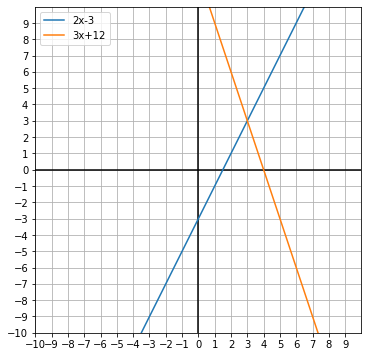

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))

# where do we want lines
ticks = np.arange(-10, 10, 1)

# draw grid
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.grid(True, which='both')

# 1-1 X and Y proportion
ax.set_aspect('equal')

# X and Y axes
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# set axes' limits
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])

#Delimita la línea que se dibuja y define el número de puntos que va a usar para dinujarla
x = np.linspace(
    start=-10, 
    stop=10, 
    num=300
)

# Las funciones que queremos graficar
y1 = 2 * x - 3
y2 = -3 * x +12

plt.plot(x, y1, "-", markersize=10, label="")

plt.legend()

#### 2.2. What are the respective slopes

'2' y '-3'

#### 2.3. Give 3 points through which $y_1$ goes through

x = -3, x = 0, x = 3  Esto sería a ojo viendo la gráfica


In [30]:
respuesta = []
for elem in [1, 2, 3]:
    y = 2 * elem -3
    respuesta.append((elem , y))

In [31]:
respuesta

[(1, -1), (2, 1), (3, 3)]

#### 2.4. Where do they intersect?

In [40]:
x = 0
while not (2*x-3 == -3*x + 12):
    x += 1

print(x)

3


#### 2.5. BONUS 

My yearly salary has increased **linearly** with my age:  
When I was 21 years old, I did 10000\\$ / year    
Today I am 39 years old, I am doing 33400\\$ / year  
How much will I do when I get 50 years old?

si es lineal, cada año has ido aumentando la misma cantidad de dinero 21 = 10000  y 39 = 33400 así que en 18 años has aumentado 23400 que dividido entre 18 es 1300 cada año m = 1300

In [44]:
39-21

18

In [45]:
23400/18

1300.0

yo en este punto habría dicho que 'y = 1300x -10000'( que es el valor inicial) siendo y el salario y x los años

pero cual es mi sorpresa que si hago el cálculo, en 21 años, no me da 21000

In [46]:
1300*21 -10000

17300

asi que he decidido que n sea 17300 porque es lo que le tengo que restar a 21 * 1300 para que me de el resultado que dice el enunciado. Por lo tanto se quedaría en 'y = 1300x - 17300'

Y ahora si sustituyo la x por 39, si que me da el resultado esperado

In [47]:
1300*39 -17300

33400

Así que entiendo que si aplico esta fórmula me debería de funcionar

In [48]:
1300*50 -17300

47700

### 3. Polynomials

Consider these different degree polynomials:  
$y_2=x^2-3x-10$  
$y_3=x^3-2x^2+5x+1$  
$y_4=x^4-x^3+x^2-x+1$  

#### 3.1. Plot them

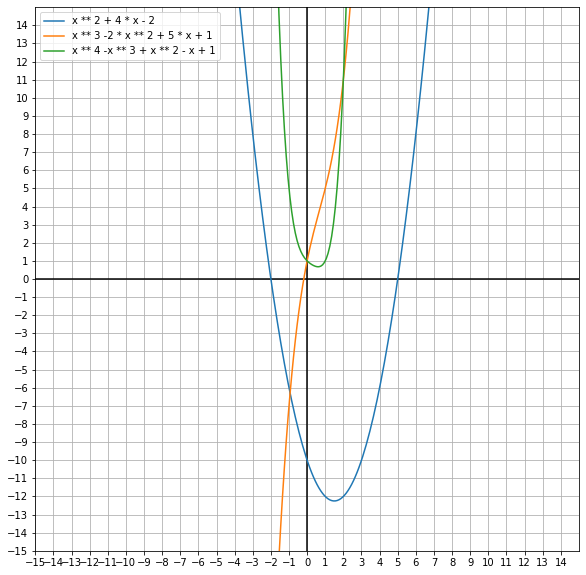

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))

# where do we want lines
ticks = np.arange(-15, 15, 1)

# draw grid
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.grid(True, which='both')

# 1-1 X and Y proportion
ax.set_aspect('equal')

# X and Y axes
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# set axes' limits
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])

#Delimita la línea que se dibuja y define el número de puntos que va a usar para dinujarla
x = np.linspace(
    start=-15, 
    stop=15, 
    num=300
)

# Las funciones que queremos graficar
y2 = x ** 2 - 3 * x -10
y3 = x ** 3 - 2 * x ** 2 + 5 * x + 1
y4 = x ** 4 - x ** 3 + x ** 2 - x + 1

plt.plot(x, y2, "-", label= "x ** 2 - 3 * x -10")
plt.plot(x, y3, "-", label= "x ** 3 -2 * x ** 2 + 5 * x + 1")
plt.plot(x, y4, "-", label=                   "x ** 4 -x ** 3 + x ** 2 - x + 1")

plt.legend()

#### 3.2. Which one takes a bigger value on $x=0$? On $x=2$? On $x=100$?

In [66]:
def valor(x):
    lista_valores = list()
    lista_valores.append(x ** 2 -3 * x -10)
    lista_valores.append(x ** 3 -2 * x ** 2 + 5 * x + 1)
    lista_valores.append(x ** 4 -x ** 3 + x ** 2 - x + 1)
    return lista_valores

In [70]:
valor(0) #La de tercer y cuarto grado

[-10, 1, 1]

In [73]:
valor(2)  #La de tercer y cuarto grado

[-12, 11, 11]

In [72]:
valor(100)  #La de cuarto grado

[9690, 980501, 99009901]

#### 3.3. Who is the vertex of parabola $y_2$?

-b/2a para hallar la coordenada x ----------> 3/2 = 1.5

sustituimos el valor de x en la función original --------->  3/2 ** 2   -   3/2 * 3   -   10
                                                             9/4  -  9/2  - 10  = (9 - 18 -40) /4 = -49/4 = -12.25

vértice de la parábola (1.5, -12.25)

#### 3.4. Where does $y_2$ intersect X axis? And Y axis?

Corta en el eje x en los puntos 5 y -2

In [76]:
(3 + 7) / 2

5.0

In [77]:
(3 - 7) / 2

-2.0

Corta en el eje y en el punto -10

In [79]:
y = 0 ** 2 - 3 * 0 -10

In [80]:
y

-10

#### 3.5. As x gets very big, what happens to $y$ go in each case?

en la de segundo grado  y la de tercer grado aparentemente aumentan de manera uniforme aunque en la de tercer grado en mayor medida (no son paralelas, pero su comportamiento es muy similar aunque la apertura es distinta). Pero en la de cuarto grado aumenta muchísimo más.

#### 3.6. As x gets very small (big negative), what happens to $y$ go in each case?

In [83]:
valor(0)

[-10, 1, 1]

In [85]:
valor(-100)

[10290, -1020499, 101010101]

In [86]:
valor(-1000)

[1002990, -1002004999, 1001001001001]

La función de segundo grado se comporta igual que con los valores positivos, pero llegando antes a los valores de y, dado el vertice en x = 1.25 necesita menos valor de x para un mayor valor de y.

La función de tercer grado se comporta muy similar pero devolviendo valores de y negativos

La función de cuarto grado parece comportarse igual pero más brusca

### 4. Exponential

#### 4.1. Print number $e$ rounded to 3 decimal figures

In [87]:
print(round(np.e, 3))

2.718


#### 4.2. Compute $e$ to the powers 0, 1, 2, 3, 10

In [88]:
print(round(np.e, 3) ** 0)
print(round(np.e, 3) ** 1)
print(round(np.e, 3) ** 2)
print(round(np.e, 3) ** 3)
print(round(np.e, 3) ** 10)

1.0
2.718
7.387524
20.079290231999998
22003.639649915618


#### 4.3. Compute $e$ to the powers 0, -1, -2, -3, -10

In [89]:
print(round(np.e, 3) ** 0)
print(round(np.e, 3) ** -1)
print(round(np.e, 3) ** -2)
print(round(np.e, 3) ** -3)
print(round(np.e, 3) ** -10)

1.0
0.36791758646063283
0.13536335042701722
0.04980255718433305
4.544702676058572e-05


#### 4.4. Plot functions $e^x$, $e^{2x}$, $e^{-x}$

Note: choose an appropiate x-range to visualize them all toguether

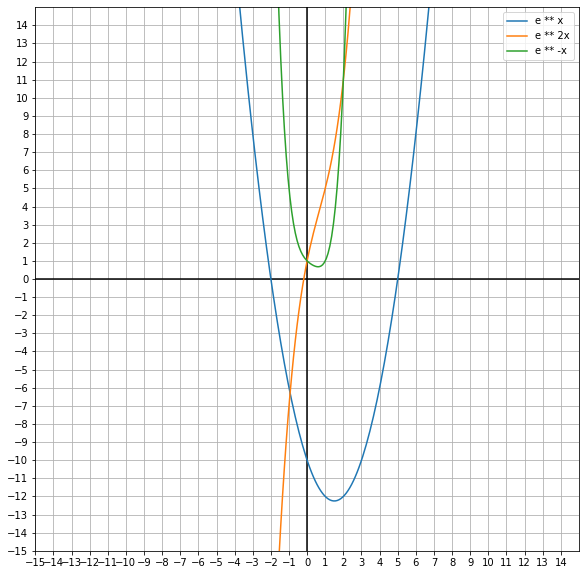

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))

# where do we want lines
ticks = np.arange(-15, 15, 1)

# draw grid
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.grid(True, which='both')

# 1-1 X and Y proportion
ax.set_aspect('equal')

# X and Y axes
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# set axes' limits
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])

#Delimita la línea que se dibuja y define el número de puntos que va a usar para dinujarla
x = np.linspace(
    start=-15, 
    stop=15, 
    num=300
)

# Las funciones que queremos graficar
y5 = np.e ** x
y6 = np.e ** 2 * x
y7 = np.e ** -x

plt.plot(x, y2, "-", label= "e ** x")
plt.plot(x, y3, "-", label= "e ** 2x")
plt.plot(x, y4, "-", label= "e ** -x")

plt.legend()

### 5. Sum notation

Find the following:

$$\sum_{n=4}^7 n$$

In [96]:
resultado = 0
for i in range(4,8):
    resultado += i
resultado

22

$$\sum_{n=-2}^3 (n + 1)$$

In [97]:
resultado = 0
for i in range(-2, 4):
    resultado += i + 1
resultado

9

$$\sum_{n=-2}^3 (n^2 - 2)$$

In [98]:
resultado = 0
for i in range(-2, 4):
    resultado += (i ** 2) - 2
resultado

7

$$\sum_{n=0}^4 (10^n - 1)$$

In [99]:
resultado = 0
for i in range(0, 5):
    resultado += (10 ** i) - 1
resultado

11106

### 6. Combinatorics

#### 6.1. Ten people go to a party. How many handshakes happen?

$${N\choose k} \equiv \frac{N!}{k!(N-k)!}$$

In [117]:
math.factorial(10) / (math.factorial(2) * math.factorial(10 - 2))

45.0

#### 6.2. My family is composed of 11 members. By christmas, one buys food, one cooks and one cleans. How many possible arrangements of buyer-cooker-cleaner are there?

$$V_k^N = \frac{N!}{(N-k)!}$$

In [121]:
math.factorial(11) / math.factorial(11 - 3)

990.0

### BONUS

11 and 13 are twin primes, since:
 - they are both primes  
 - their distance is 2
 
Find all pairs of twin primes below 1000

In [135]:
def es_primo(numero):
    for i in range(2,numero):
        if numero % i == 0:
            return False
    return True

In [157]:
lista_pares = []
aux = 0

for n in range (1,1000):
    primo = es_primo(n)
    if primo == True and n - aux == 2:
        lista_pares.append((aux, n))
        aux = n
    elif primo == True:
        aux = n


In [161]:
lista_pares

[(3, 5),
 (5, 7),
 (11, 13),
 (17, 19),
 (29, 31),
 (41, 43),
 (59, 61),
 (71, 73),
 (101, 103),
 (107, 109),
 (137, 139),
 (149, 151),
 (179, 181),
 (191, 193),
 (197, 199),
 (227, 229),
 (239, 241),
 (269, 271),
 (281, 283),
 (311, 313),
 (347, 349),
 (419, 421),
 (431, 433),
 (461, 463),
 (521, 523),
 (569, 571),
 (599, 601),
 (617, 619),
 (641, 643),
 (659, 661),
 (809, 811),
 (821, 823),
 (827, 829),
 (857, 859),
 (881, 883)]